<a href="https://colab.research.google.com/github/abdul23lm/classification-for-predicting-student-performance/blob/master/classification_for_predicting_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification For Predicting Student Performance**

Menggunakan Metodologi KDD (Knowledge Discovery Database)
Pada proses Knowledge Discovery Database (KDD) terdapat beberapa fase yaitu sebagai berikut:
1.   Seleksi Data (Selection)
2.   Pemilihan Data (Preprocessing/Cleaning)
3.   Transformasi (Transformation)
4.   Data Mining
5.   Interpretasi/Evaluasi (Interpratation/Evaluation)


# 1. Seleksi Data (Selection)
Memanggil Dataset student-por

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

from zipfile import ZipFile

with ZipFile("student.zip") as zip:
  zip.extractall()

--2019-11-06 18:17:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip.4’

student.zip.4       100%[===================>]  20.00K  --.-KB/s    in 0.06s   

2019-11-06 18:17:47 (319 KB/s) - ‘student.zip.4’ saved [20478/20478]



# 2. Pemilihan Data (Preprocessing/Cleaning)


In [0]:
import pandas as pd

data = pd.read_csv("student-por.csv")
data.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


Data tidak muncul karena pada dataset terdapat delimiter ; sebagai pemisah antar kolom. Maka dari itu harus dihilangkan dulu.

In [0]:
import pandas as pd

data = pd.read_csv("student-por.csv",delimiter=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Cek missing value

In [0]:
data.isnull().values.any()

False

Cek jumlah baris dan kolom

In [0]:
data.shape

(649, 33)

In [0]:
data.describe(include="all")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,649,649,649.000000,649.000000,649.000000,649,649,649,649,649,649,649,649,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,no,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,285,455,NaN,NaN,NaN,581,398,610,334,521,580,498,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,NaN,NaN,1.568567,1.930663,0.221880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,NaN,NaN,0.748660,0.829510,0.593235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

# 3. Transformasi (Transformation)
Mengubah G3 nominal, if x >= 10 then lulus else gagal

In [0]:
# Mengubah G3 nominal
# if x >= 10 then lulus else gagal

def conv(nilai):
  return "lulus" if nilai >= 10 else "gagal"

data['G3'] = data['G3'].apply( conv )

In [0]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,lulus
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,lulus
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,lulus
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,lulus
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,lulus


Mengubah dari string ke numerik

In [0]:
for x in data.columns:
  if data[x].dtypes not in ['int64','float']:
    data[x] = le.fit_transform(data[x])

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,1
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,1
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,1
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,1
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,1


Menghapus kolom G3

In [0]:
student_features = data.columns.tolist()
student_features.remove('G3') 
student_features

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

In [0]:
X = data.drop(columns=['G3'])
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,0,1,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11
645,1,0,18,1,1,1,3,1,4,3,0,1,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15
646,1,0,18,1,0,1,1,1,2,2,0,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12
647,1,1,17,1,1,1,3,1,3,3,0,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10


# 4. Data Mining 
Split Data Train & Data Testing

In [0]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, data.G3 ,test_size=0.25 , random_state=12)
x_train


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
564,1,1,16,0,0,1,3,2,3,2,0,0,2,1,0,0,0,0,0,1,1,1,0,4,5,5,2,3,5,2,11,9
251,0,0,16,1,0,1,2,1,2,2,1,1,1,1,0,0,0,0,0,1,1,1,1,4,5,2,1,1,5,4,9,10
67,0,0,16,1,0,1,3,1,3,2,0,1,1,4,0,1,1,0,0,1,1,1,0,4,3,3,1,2,5,0,10,9
442,1,1,15,0,1,1,4,1,1,3,3,0,1,2,0,0,1,0,1,1,1,1,0,5,3,4,1,2,2,0,12,13
370,0,0,19,1,1,0,1,1,2,2,0,2,3,2,2,0,1,0,0,0,1,1,1,5,3,4,1,1,4,2,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,17,1,1,1,1,1,0,0,0,1,1,3,0,0,1,0,1,1,1,1,1,4,3,2,1,2,4,10,11,10
642,1,0,17,1,0,1,4,3,4,2,2,1,2,2,0,0,0,0,0,1,1,1,0,5,5,4,1,1,1,0,6,9
241,0,1,17,1,1,1,2,3,3,3,3,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,3,3,0,10,11
253,0,0,18,1,1,0,2,4,3,2,0,1,2,2,1,0,1,0,0,1,1,1,0,4,3,3,1,1,3,18,10,10


In [0]:
data.school

0      0
1      0
2      0
3      0
4      0
      ..
644    1
645    1
646    1
647    1
648    1
Name: school, Length: 649, dtype: int64

Proses Training menggunakan **Decision Tree** dengan **Algoritma C4.5**

In [0]:
grade_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
grade_classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=32,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

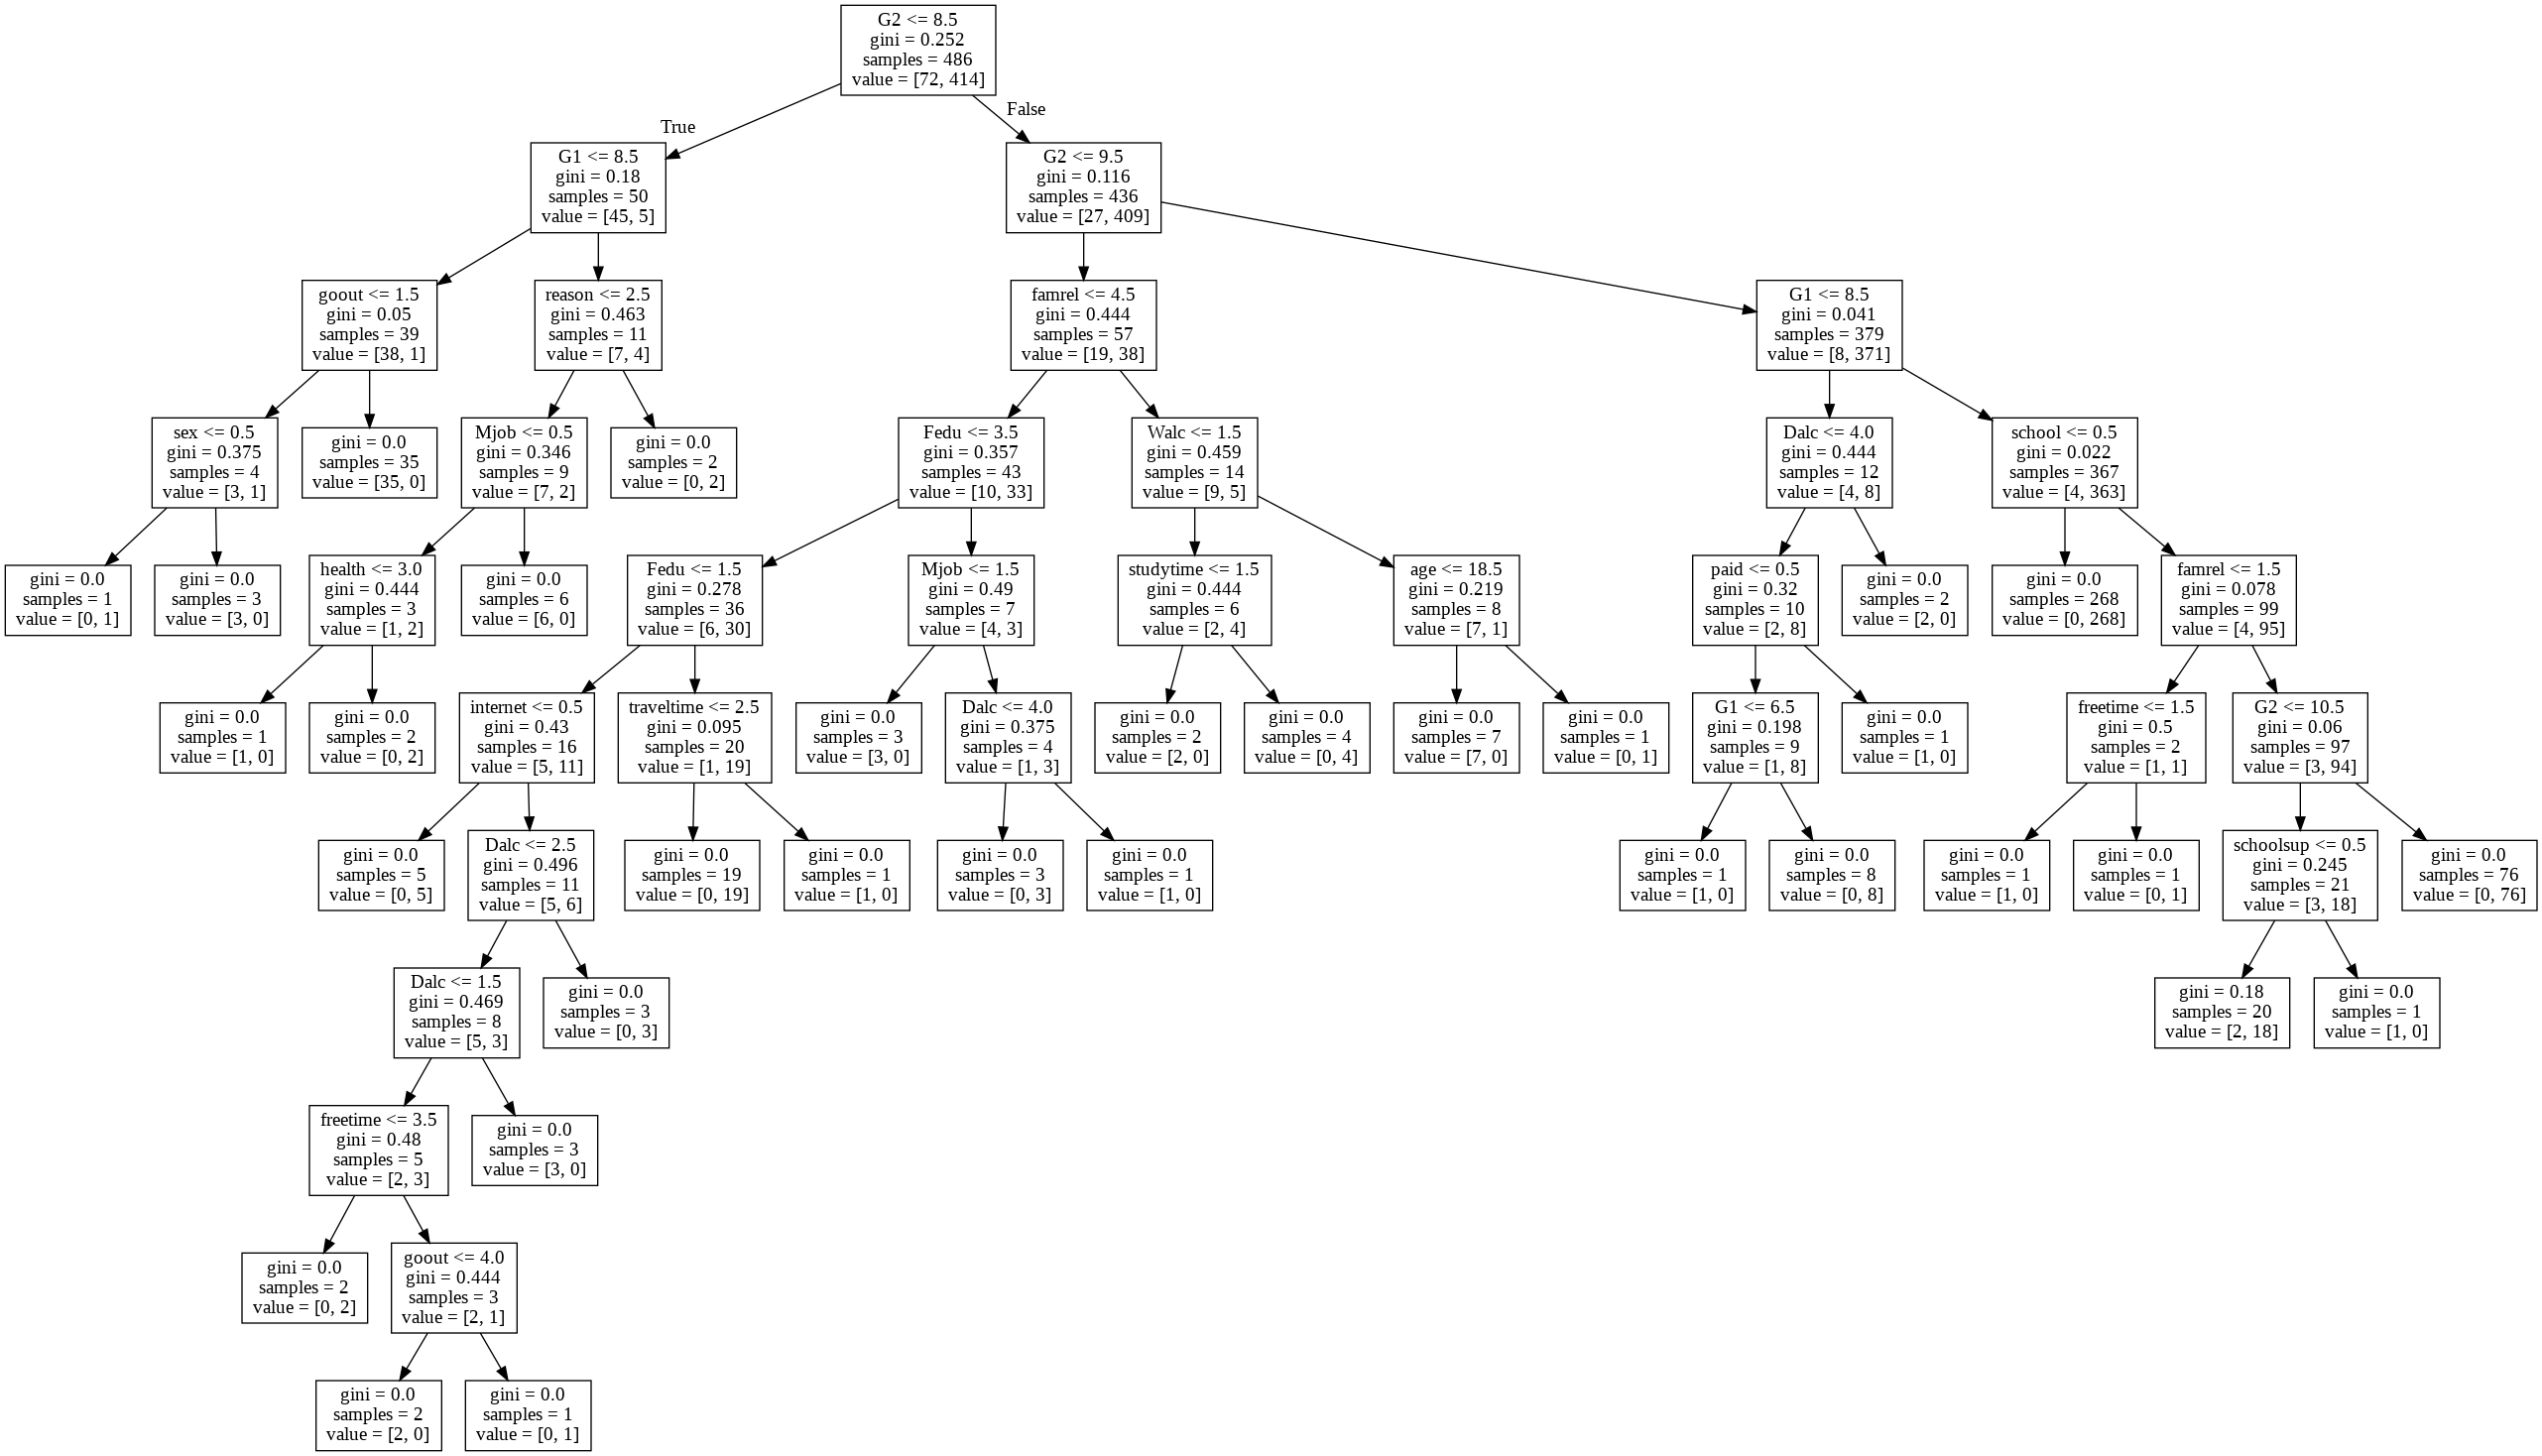

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(grade_classifier, out_file=dot_data, feature_names=student_features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# 5. Interpretasi/Evaluasi (Interpratation/Evaluation)

Lakukan prediksi

In [0]:
predictions = grade_classifier.predict(x_test)

Terakhir, uji keakuratannya

In [0]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.901840490797546

Jadi, skor akurasi 0.902 tidak buruk, kita juga bisa mengatur hyperparameters untuk meningkatkan skor akurasi